# Imports

In [1]:
import os
import torch
import pickle
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append("../")

from detect import rectangles_on_mip
from utils import Metrics, get_boxes_from_json_files, print_stats, get_boxes_from_yolo_folder

# Give the path to the data and its Ground Truth labels here.

In [3]:
data_path = "./test_data/images"
labels_path = "./test_data/labels"

# Give the path to prediction you want to compare with ground_truth here

In [4]:
pred_path = "../results/images_2023_02_01:14_01_58/results.pkl"

# Run below cell to see the results

Precision:  0.9358
Recall:     0.9409
F1:         0.9383

There are 186 bacteria in the folder
Correctly detected 175 bacteria out of 187 predictions

Average time for finding the start frame        --- 3.74 sec. | 1 folder(s)
Average time for single frame inference         --- 0.92 sec. | 41 image(s)
Average time for preprocessing a single frame   --- 1.26 sec. | 41 image(s)
Average time for postprocessing a single frame  --- 0.02 sec. | 41 image(s)
Average total time for detection                --- 91.30 sec. | 1 folder(s)


Red boxes are the ground_truth boxes


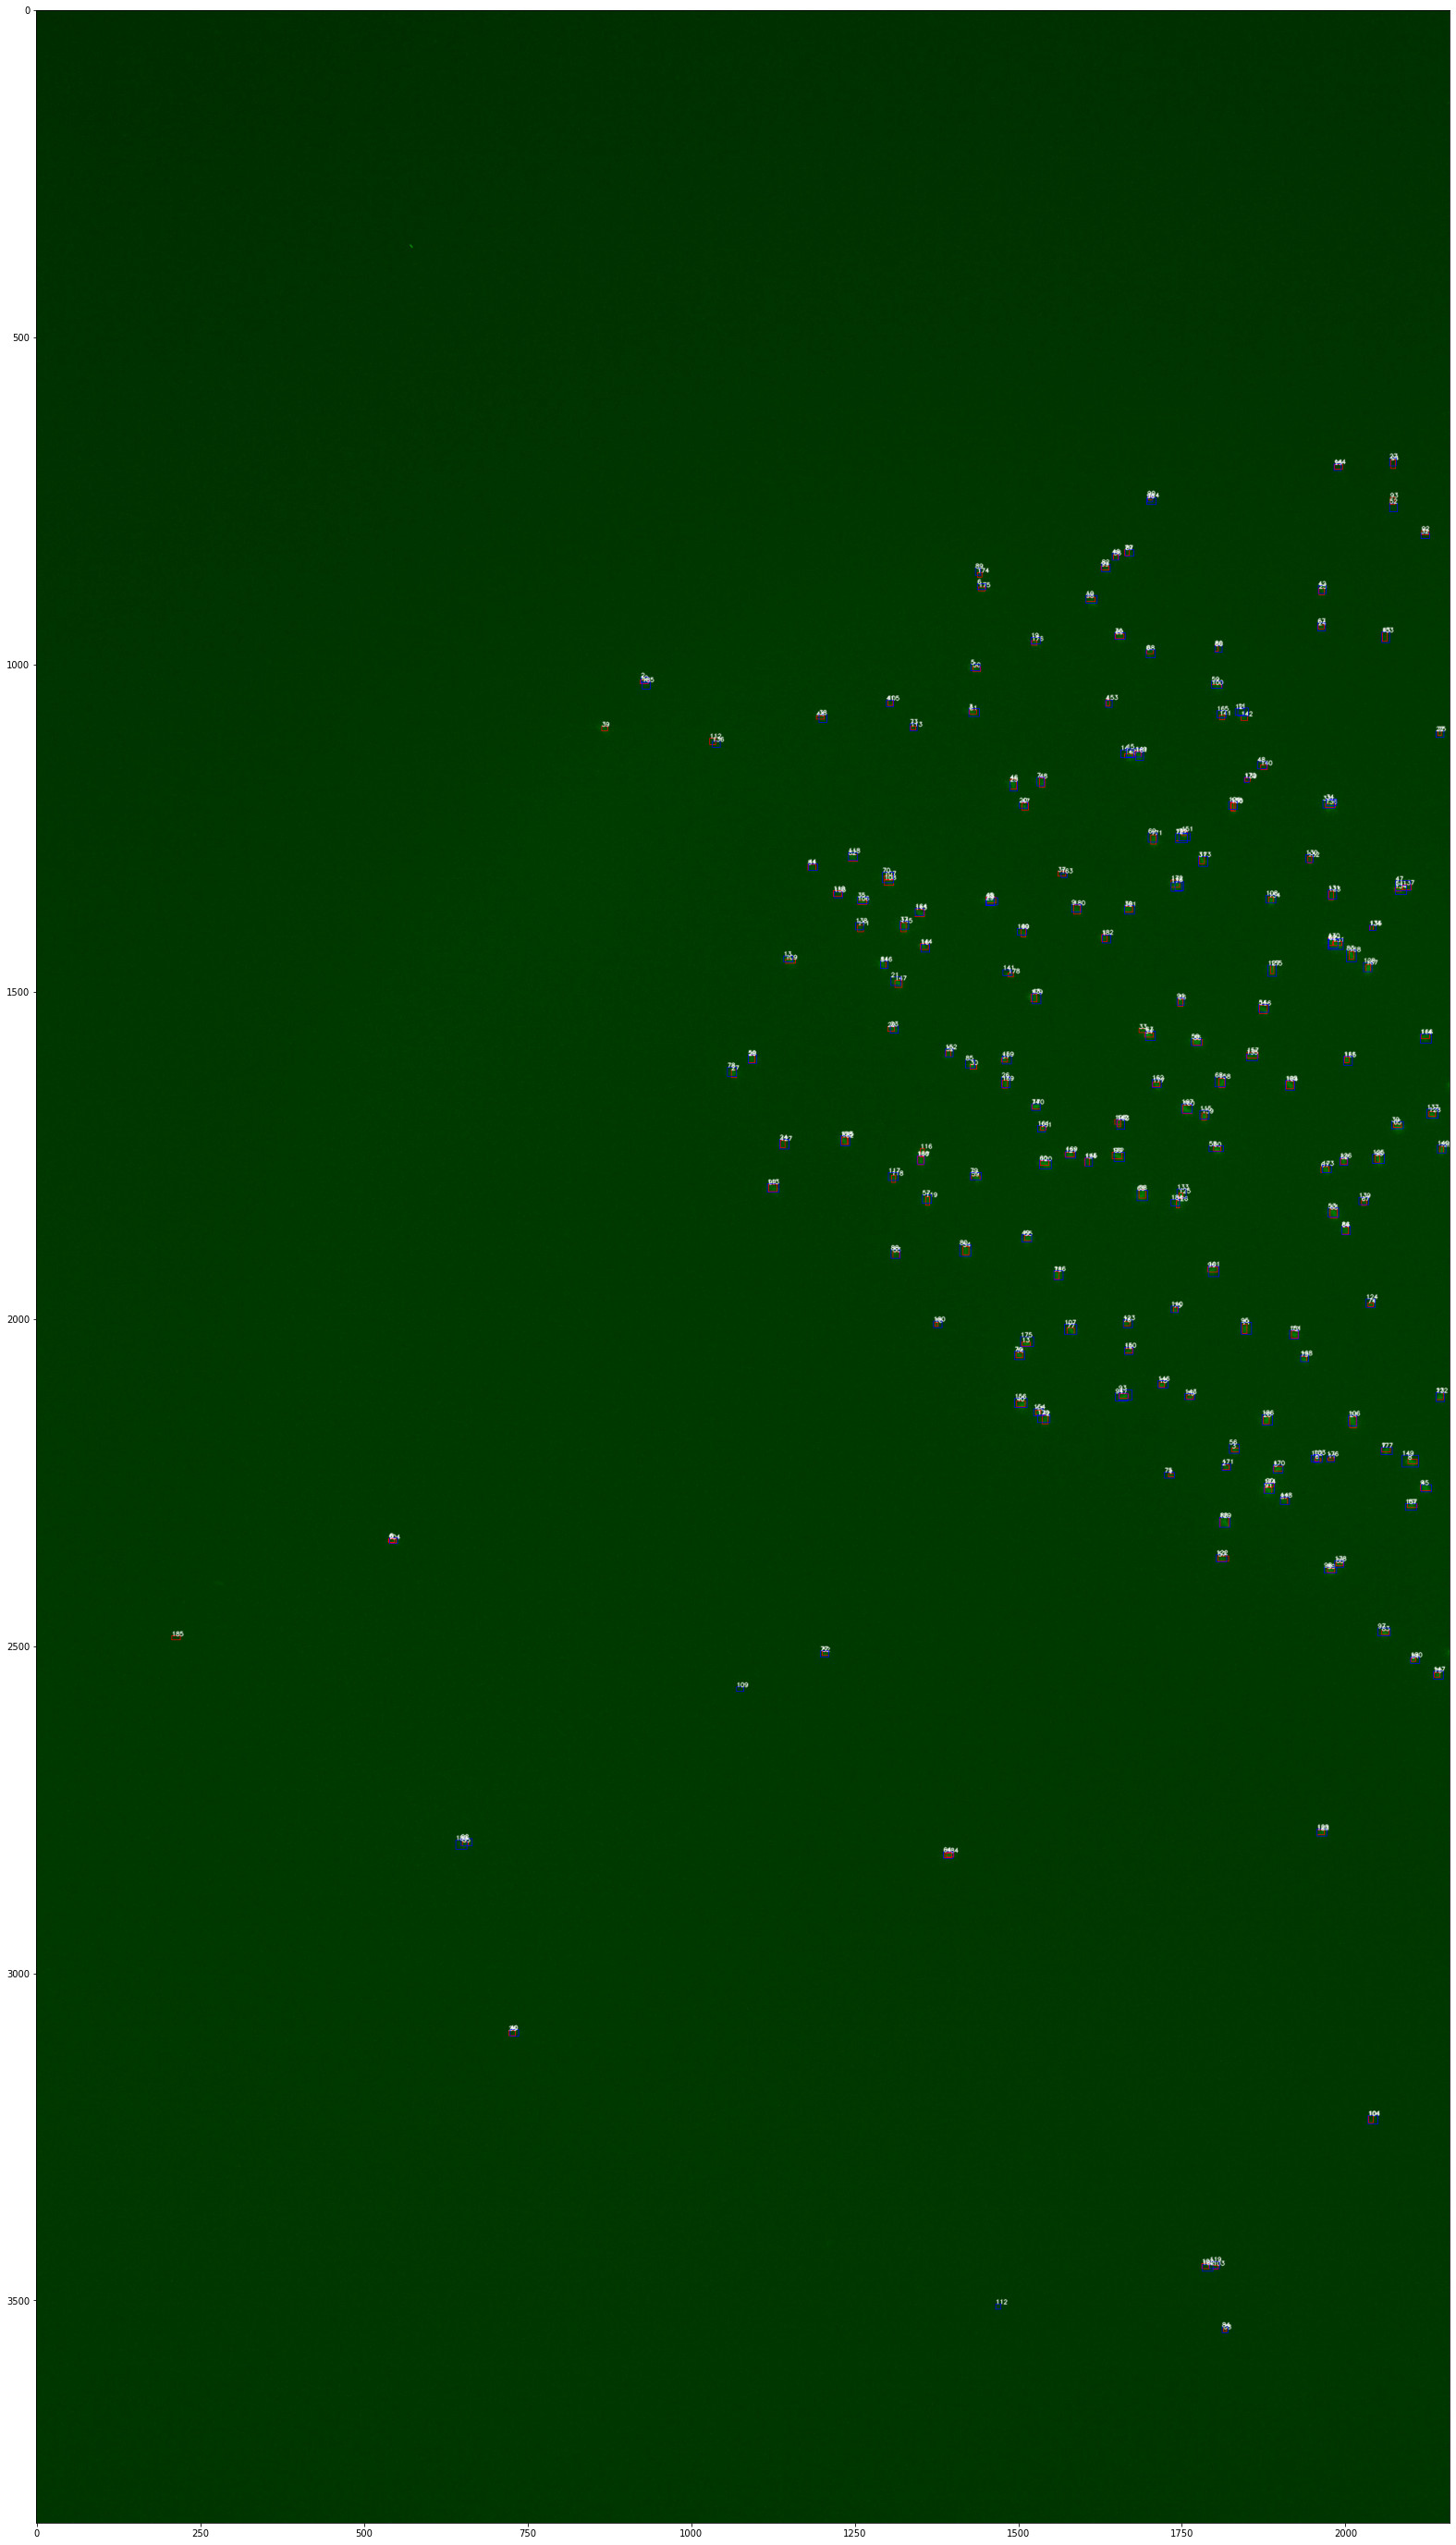

In [5]:
# Loading the mip
mip = plt.imread(os.path.join(data_path,"output_mip.jpeg"))

# Loading the detection results
with open(pred_path,"rb") as f:
    pred_boxes, times = pickle.load(f)

pred_boxes = torch.from_numpy(pred_boxes)
pred_boxes = pred_boxes[:,:4].to(torch.float)


# true_boxes = get_boxes_from_json_files(labels_path)[:,[0,2,1,3]]
true_boxes = get_boxes_from_yolo_folder(labels_path, mip.shape[:-1])
print_stats(true_boxes, pred_boxes, times)
print("\n\nRed boxes are the ground_truth boxes")

mip = rectangles_on_mip(mip, true_boxes.to(int).numpy(), box_format='xyxy_one',color=(255, 0, 0))
mip = rectangles_on_mip(mip, pred_boxes.to(int).numpy(), box_format='xyxy_one',color=(0, 0, 255))

plt.figure(figsize=(50,50))
plt.imshow(mip)
plt.show()